In [270]:
#小学生のテスト結果の分析（データ駆動型アプローチ） 

In [236]:
#分析準備

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.decomposition import PCA

In [246]:
data = pd.read_csv('seiseki.csv')

In [247]:
data.head()

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
0,30,43,51,63,60,66,37,44,20
1,39,21,49,56,70,72,56,63,16
2,29,30,23,57,69,76,33,54,6
3,95,87,77,100,77,82,78,96,87
4,70,71,78,67,72,82,46,63,44


In [248]:
data.describe()

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,52.331325,39.602410,45.614458,49.885542,42.331325,62.457831,57.740964,47.307229,39.084337
std,21.835858,21.456335,24.236127,21.408130,22.894855,17.188298,26.577943,22.519397,29.507351
min,0.000000,4.000000,0.000000,9.000000,2.000000,15.000000,2.000000,2.000000,0.000000
25%,35.000000,23.000000,28.000000,31.000000,25.250000,52.000000,35.250000,31.250000,12.000000
50%,53.000000,35.000000,43.000000,49.000000,41.500000,65.000000,60.000000,48.500000,35.000000
75%,70.000000,53.750000,63.750000,65.750000,58.750000,75.750000,82.000000,65.000000,66.750000
max,96.000000,90.000000,100.000000,100.000000,96.000000,99.000000,99.000000,100.000000,99.000000


In [249]:
data.corr()

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
kokugo,1.000000,0.782622,0.718526,0.717996,0.707128,0.684195,0.413712,0.672814,0.761428
shakai,0.782622,1.000000,0.778242,0.834075,0.748877,0.608664,0.185622,0.678119,0.787477
sugaku,0.718526,0.778242,1.000000,0.817947,0.754571,0.575662,0.153075,0.582756,0.800563
rika,0.717996,0.834075,0.817947,1.000000,0.788183,0.594857,0.103854,0.726054,0.753886
ongaku,0.707128,0.748877,0.754571,0.788183,1.000000,0.654765,0.298004,0.591194,0.698030
bijutu,0.684195,0.608664,0.575662,0.594857,0.654765,1.000000,0.433882,0.542767,0.573575
taiiku,0.413712,0.185622,0.153075,0.103854,0.298004,0.433882,1.000000,0.146222,0.275560
gika,0.672814,0.678119,0.582756,0.726054,0.591194,0.542767,0.146222,1.000000,0.609608
eigo,0.761428,0.787477,0.800563,0.753886,0.698030,0.573575,0.275560,0.609608,1.000000


In [250]:
#分析1回目

#切り口:文系理系で個人の違いはあるのか？
#手法:主成分解析による抽出

In [251]:
data = data.drop(columns=['taiiku','ongaku','bijutu','gika','eigo'])
data = data.dropna()
data.describe()

,kokugo,shakai,sugaku,rika
count,166.000000,166.000000,166.000000,166.000000
mean,52.331325,39.602410,45.614458,49.885542
std,21.835858,21.456335,24.236127,21.408130
min,0.000000,4.000000,0.000000,9.000000
25%,35.000000,23.000000,28.000000,31.000000
50%,53.000000,35.000000,43.000000,49.000000
75%,70.000000,53.750000,63.750000,65.750000
max,96.000000,90.000000,100.000000,100.000000


In [252]:
corr_matrix = data.corr()

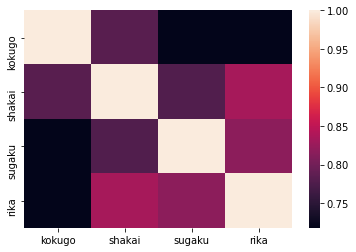

In [253]:
sns.heatmap(corr_matrix)

In [254]:
df = pd.DataFrame(data=data,columns=['kokugo','shakai','sugaku','rika'])
df['bunkei_rikei'] = np.where(df['kokugo'] + df['shakai'] - df['sugaku'] - df['rika'] >=0,'L','S' )
df.head()

,kokugo,shakai,sugaku,rika,bunkei_rikei
0,30,43,51,63,S
1,39,21,49,56,S
2,29,30,23,57,S
3,95,87,77,100,L
4,70,71,78,67,S


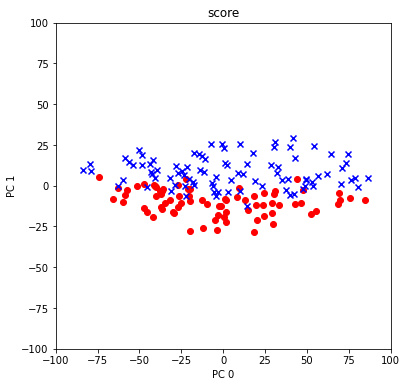

In [255]:
#主成分分析(文理による違いはあまり見られない)

X = data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.figure(figsize=(6,6))

for target,marker,color in zip('LS','ox','rb'):
    plt.scatter(X_pca[df['bunkei_rikei']==target,0],X_pca[df['bunkei_rikei']==target,1],marker=marker,color=color )
    
    plt.xlim([-100,100])
    plt.ylim([-100,100])
    plt.title('score')
    plt.xlabel('PC 0')
    plt.ylabel('PC 1')

In [256]:
#寄与率
print(pca.explained_variance_ratio_)

[0.83141975 0.07912514]


In [257]:
#因子負荷量
pca.components_*np.sqrt(pca.explained_variance_)[:,np.newaxis]

array([[19.11790816, 19.86989087, 22.32458143, 19.74611605],
       [-9.68917951, -1.87915453,  6.87063499,  3.50405057]])

In [258]:
#結果:文系理系の差はあまり見られなかった

#発見された知見:小学生時点では個人の各教科ごと得点差はあまり大きくないこと
#             :できる学生とできない学生の差が大きいこと
        
#知見の評価:文理の差はあまり見られなかった、
#         :小学生は個人の文理適性よりも学習時間やポテンシャルによることが大きいのではと考えた。
#
#

In [259]:
#2回目

#切り口:できる子とできない子の差は本当に大きいのか？
#      :文系と理系の差は高得点組と低得点組で違いがあるのか？
#手法:クラスター分析（k-means法）

In [260]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm

In [261]:
cust_array = np.array([df['kokugo'].tolist(),df['shakai'].tolist(),df['sugaku'].tolist(),df['rika'].tolist()],np.int32)
cust_array = cust_array.T

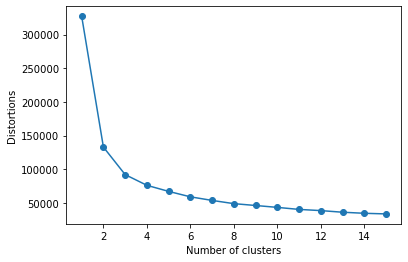

In [262]:
distortions = []

for i in range(1,16):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(cust_array)
    distortions.append(km.inertia_)
    

plt.plot(range(1,16),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()

In [263]:
pred = KMeans(n_clusters=4).fit_predict(cust_array)
data['cluster_no']=pred
data.head(10)

,kokugo,shakai,sugaku,rika,cluster_no
0,30,43,51,63,0
1,39,21,49,56,0
2,29,30,23,57,0
3,95,87,77,100,2
4,70,71,78,67,2
5,67,53,56,61,1
6,29,26,44,52,0
7,56,54,37,59,1
8,45,21,7,44,3
9,68,41,29,81,1


In [264]:
data['bunkei_score'] = data['kokugo'] + data['shakai']
data['rikei_score'] = data['sugaku'] + data['rika']
data.head()

,kokugo,shakai,sugaku,rika,cluster_no,bunkei_score,rikei_score
0,30,43,51,63,0,73,114
1,39,21,49,56,0,60,105
2,29,30,23,57,0,59,80
3,95,87,77,100,2,182,177
4,70,71,78,67,2,141,145


In [265]:
data['cluster_no'] = data['cluster_no'].astype('category')

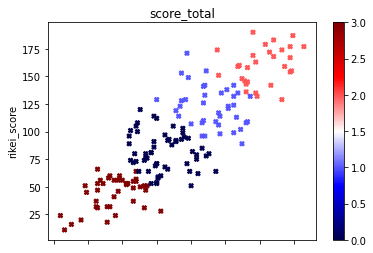

In [266]:

data.plot(kind='scatter',x='bunkei_score',y='rikei_score',c=data['cluster_no'],cmap=cm.seismic,title='score_total',marker='X')
plt.show()        

In [267]:
#結果:勉強ができる子とできない子の差は大きい
#    :文系理系の差はなかった

#発見された知見:得点別に見ても、小学生では文理のスコアに大きな差はなかった。
#   　　　　   :勉強ができる子は文系理系ともにスコアが高く、できない子は両方とも出来ていないことが分かった

#知見の評価:k-means法で4分類に分けたときは分散されることを予想していたため、新たな発見だった。
#　　　　　:また、4分類がdescribe関数で出した表とあまり変化がなかったことは意外だった。
#　　　　　:4分類で1番下のグループでは技能教科に秀でた学生が多いのでは？と感じた。
